In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
import matplotlib.pylab as plt
from getCitiBikeCSV import getCitiBikeCSV
from fiona.crs import from_epsg
from geopandas import GeoDataFrame

In [3]:
print os.getenv("PUIDATA")

None


## Working with Shape File

Loading Census Tract Shape File

In [4]:
shape_path="/home/cusp/cc5219/PUIdata/Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)

In [5]:
ct_shape.index=ct_shape.BoroCT2010

In [6]:
ct_shape.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."


In [7]:
ct_shape.index

Index([u'5000900', u'5012500', u'5013301', u'5019700', u'5002002', u'5006400',
       u'5007400', u'5018701', u'1002202', u'1003200',
       ...
       u'1002800', u'1004400', u'4137700', u'4138502', u'1028700', u'1029700',
       u'3000100', u'3000301', u'1023300', u'1023700'],
      dtype='object', name=u'BoroCT2010', length=2166)

### Coordinate systems, projections, and transformations 

In [8]:
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

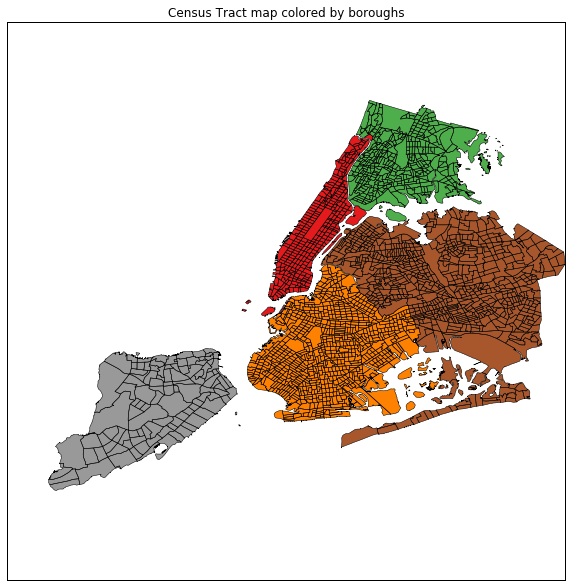

In [9]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax)
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

Load Census Data for 2010

In [10]:
ct_data=DataFrame.from_csv("/home/cusp/cc5219/PUIdata/Data/ACS_CT2010.csv")
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)#file was integ - change into str
ct_data.head()

,BoroCT2010,Geo_NAME,Geo_QName,Geo_FIPS,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_COUNTYSC,Geo_COUSUB,...,SE_T017_017,SE_T017_018,SE_T017_019,SE_T017_020,SE_T017_021,SE_T017_022,SE_T017_023,SE_T017_024,SE_T017A001,SE_T017A002
BoroCT2010,,,,,,,,,,,,,,,,,,,,,
5000900,5000900,Census Tract 9,"Census Tract 9, Richmond County, New York",36085000900,140,0,36,85,19,NaN,...,32,23,13,12,10,12,11,7,746,50
5012500,5012500,Census Tract 125,"Census Tract 125, Richmond County, New York",36085012500,140,0,36,85,19,NaN,...,50,50,28,33,36,32,42,20,1522,89
5013301,5013301,Census Tract 133.01,"Census Tract 133.01, Richmond County, New York",36085013301,140,0,36,85,19,NaN,...,0,11,6,3,15,4,4,4,303,24
5019700,5019700,Census Tract 197,"Census Tract 197, Richmond County, New York",36085019700,140,0,36,85,19,NaN,...,48,56,36,50,54,32,44,36,1672,97
5002002,5002002,Census Tract 20.02,"Census Tract 20.02, Richmond County, New York",36085002002,140,0,36,85,19,NaN,...,73,126,53,73,114,83,63,63,2562,104


#### Add popuation density to CT shapefile

In [11]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset

#### Vusualize the Population density for 2010

/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


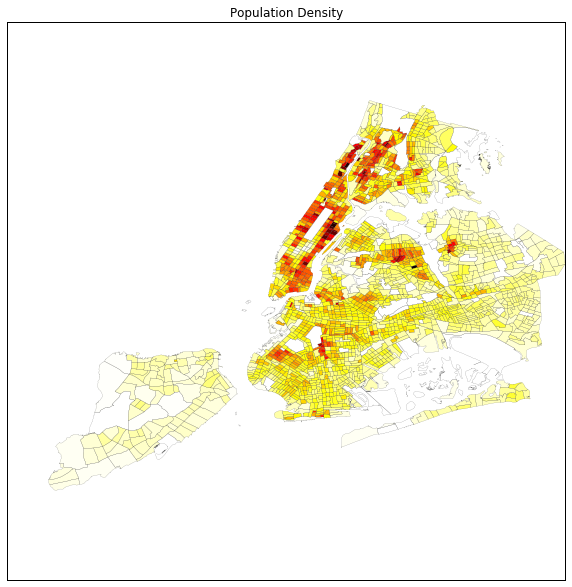

In [12]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [13]:
df_bike_monthly=DataFrame.from_csv("/home/cusp/cc5219/PUIdata/Data/CitiBike_monthly_byStation.csv")
df_bike_monthly.head(15)

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0
2013-12-31,1299,1650,4081,1686,3046,1575,830,1890,2048,1009,...,0,0,0,0,0,0,0,0,0,0
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,0
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,0
2014-03-31,804,1559,5102,1441,2643,1477,849,2004,2105,880,...,0,0,0,0,0,0,0,0,0,0


### Divided the data into different seasons. 

Define Seasons:

Spring - from March 1 to May 31;

Summer - from June 1 to August 31;

Fall (autumn) - from September 1 to November 30; and,

Winter - from December 1 to February 28 (February 29 in a leap year).

reference https://www.timeanddate.com/calendar/aboutseasons.html

In [14]:
 df_bike_monthly.index

DatetimeIndex(['2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-31', '2015-02-28',
               '2015-03-31', '2015-04-30', '2015-05-31', '2015-06-30',
               '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29',
               '2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30'],
              dtype='datetime64[ns]', name=u'starttime', freq=None)

In [15]:
df_bike_monthly_spring = df_bike_monthly[(df_bike_monthly.index.month >= 2) & (df_bike_monthly.index.month <= 4)]

In [16]:
df_bike_monthly_spring

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2014-02-28,650,960,2920,676,1808,933,508,1045,963,530,...,0,0,0,0,0,0,0,0,0,0
2014-03-31,804,1559,5102,1441,2643,1477,849,2004,2105,880,...,0,0,0,0,0,0,0,0,0,0
2014-04-30,1319,2315,7056,2371,4479,2266,1417,3288,3000,1540,...,0,0,0,0,0,0,0,0,0,0
2015-02-28,562,0,2130,913,1363,1140,356,1023,891,447,...,0,0,0,0,0,0,0,0,0,0
2015-03-31,1012,0,3574,1401,2201,2047,617,1867,1505,769,...,0,0,0,0,0,0,0,0,0,0
2015-04-30,1487,2257,6945,2627,4751,3502,1408,4541,2618,1615,...,0,0,0,0,0,0,0,0,0,0
2016-02-29,1200,1951,4913,2088,2503,2224,859,2814,0,1082,...,0,0,0,0,0,0,0,0,0,0
2016-03-31,1891,3181,7721,2529,4586,3692,1633,4015,0,1894,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,2388,3833,7666,3219,5327,4157,1794,4169,0,1928,...,310,0,0,0,0,0,0,0,0,0


In [17]:
df_bike_monthly_summer = df_bike_monthly[(df_bike_monthly.index.month >= 5) & (df_bike_monthly.index.month <= 7)]

In [18]:
df_bike_monthly_summer

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2014-05-31,1696,3125,9070,3115,6207,2897,2049,3579,3863,2062,...,0,0,0,0,0,0,0,0,0,0
2014-06-30,2048,3306,9626,3515,7255,2942,1917,3702,3694,2422,...,0,0,0,0,0,0,0,0,0,0
2014-07-31,2252,3216,9825,3509,7014,3224,2195,3732,4042,2268,...,0,0,0,0,0,0,0,0,0,0
2015-05-31,1984,3897,10265,3641,6891,5137,2055,5658,3829,2266,...,0,0,0,0,0,0,0,0,0,0
2015-06-30,2309,0,9457,3426,5859,4763,1809,5190,2695,2116,...,0,0,0,0,0,0,0,0,0,0
2015-07-31,2556,3831,10341,3958,6424,5397,2185,5688,4846,2743,...,0,0,0,0,0,0,0,0,0,0
2016-05-31,2808,6253,9246,4317,5920,5033,2109,5179,0,2459,...,901,62,20,2859,394,0,0,0,0,0
2016-06-30,3399,7370,10130,4566,7420,5775,2429,6037,0,3054,...,1036,0,0,7009,1109,665,2470,178,852,615


In [19]:
df_bike_monthly_fall = df_bike_monthly[(df_bike_monthly.index.month >= 8) & (df_bike_monthly.index.month <= 10)]

In [20]:
df_bike_monthly_fall

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2014-08-31,2179,3004,10196,3573,7328,3311,2213,4078,4011,2168,...,0,0,0,0,0,0,0,0,0,0
2014-09-30,2281,3678,10357,3680,7740,3695,2217,4112,3504,2315,...,0,0,0,0,0,0,0,0,0,0
2014-10-31,2213,3121,8881,3268,6624,4106,1798,3989,3270,2193,...,0,0,0,0,0,0,0,0,0,0
2015-08-31,2640,3799,11801,4288,7031,5417,2470,6306,4583,2838,...,0,0,0,0,0,0,0,0,0,0
2015-09-30,3115,4161,11291,4357,7282,6293,2648,6477,5061,2993,...,0,0,0,0,0,0,0,0,0,0
2015-10-31,3056,3849,10989,3461,6325,6400,2110,5188,3442,2559,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_bike_monthly_winter = df_bike_monthly[(df_bike_monthly.index.month == 11) | (df_bike_monthly.index.month == 12) |
                                        (df_bike_monthly.index.month == 1)]

In [22]:
df_bike_monthly_winter

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0
2013-12-31,1299,1650,4081,1686,3046,1575,830,1890,2048,1009,...,0,0,0,0,0,0,0,0,0,0
2014-01-31,956,1337,3178,1251,1920,1130,477,1412,1082,681,...,0,0,0,0,0,0,0,0,0,0
2014-11-30,1437,1863,5980,2339,4069,2836,1148,2584,2109,1399,...,0,0,0,0,0,0,0,0,0,0
2014-12-31,1052,1304,4501,1783,2985,2091,779,2108,1636,878,...,0,0,0,0,0,0,0,0,0,0
2015-01-31,833,0,3186,1248,1992,1429,442,1499,1366,619,...,0,0,0,0,0,0,0,0,0,0
2015-11-30,2258,3092,8810,3290,5254,4603,1789,3278,4129,1992,...,0,0,0,0,0,0,0,0,0,0
2015-12-31,1873,2502,7101,2678,3968,3492,1420,3620,3251,1654,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,1031,1669,4533,1847,2304,1943,656,2485,0,935,...,0,0,0,0,0,0,0,0,0,0


### Time Series Aanalysis

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


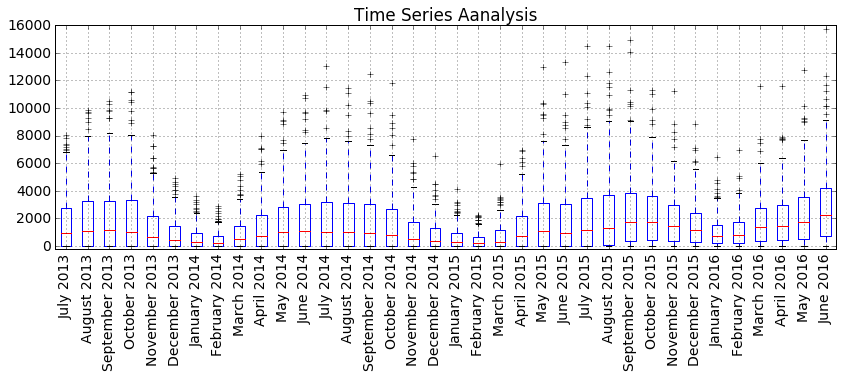

In [23]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_monthly_=df_bike_monthly.copy()
df_bike_monthly_.index=df_bike_monthly_.index.strftime("%B %Y")
df_bike_monthly_.T.boxplot(figsize=(15,7),ax=ax,rot=90);
ax.set_ylim([-200,16000])
plt.title("Time Series Aanalysis")

#### Seasonal Decomposition

/opt/rh/anaconda/root/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


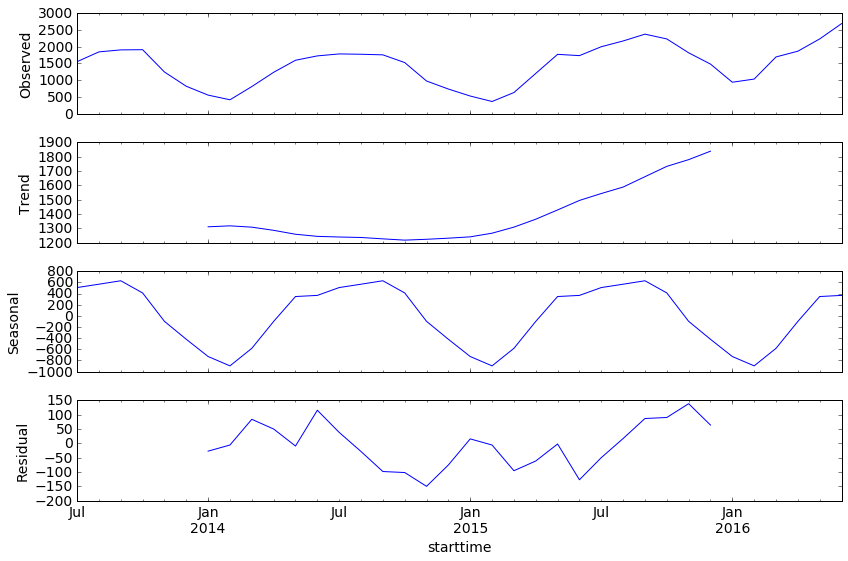

In [24]:
import statsmodels.api as sm

#Create a monthly time series of bike ride (Average of all citibike stations)
df_new=df_bike_monthly.mean(1).resample('M').mean()
df_new.interpolate(inplace=True)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(df_new.dropna())
plt.rcParams['figure.figsize']=(12,8)
resplot = res.plot()

#### Plot Time Series Aanalysis for each season

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:25

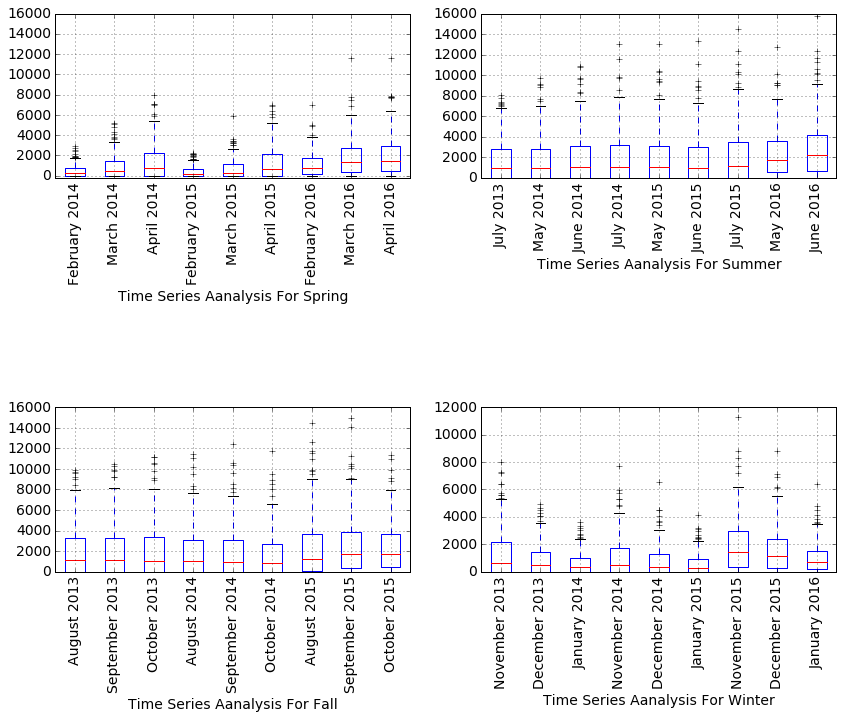

In [25]:
plt.rcParams['font.size']=14
fig = plt.figure(figsize=(14,10))
#create a copy of the df for the viz purposes
ax1 = fig.add_subplot(321)
df_bike_monthly_spring_=df_bike_monthly_spring.copy()
df_bike_monthly_spring_.index=df_bike_monthly_spring_.index.strftime("%B %Y")
df_bike_monthly_spring_.T.boxplot(figsize=(15,7),ax=ax1,rot=90);
ax1.set_ylim([-200,16000])
ax1.set_xlabel("Time Series Aanalysis For Spring")
ax2 = fig.add_subplot(322)
df_bike_monthly_summer_=df_bike_monthly_summer.copy()
df_bike_monthly_summer_.index=df_bike_monthly_summer_.index.strftime("%B %Y")
df_bike_monthly_summer_.T.boxplot(figsize=(15,7),ax=ax2,rot=90);
#ax.set_ylim([-200,16000])
ax2.set_xlabel("Time Series Aanalysis For Summer")
ax3 = fig.add_subplot(325)
df_bike_monthly_fall_=df_bike_monthly_fall.copy()
df_bike_monthly_fall_.index=df_bike_monthly_fall_.index.strftime("%B %Y")
df_bike_monthly_fall_.T.boxplot(figsize=(15,7),ax=ax3,rot=90);
#ax.set_ylim([-200,16000])
ax3.set_xlabel("Time Series Aanalysis For Fall")
ax4 = fig.add_subplot(326)
df_bike_monthly_winter_=df_bike_monthly_winter.copy()
df_bike_monthly_winter_.index=df_bike_monthly_winter_.index.strftime("%B %Y")
df_bike_monthly_winter_.T.boxplot(figsize=(15,7),ax=ax4,rot=90);
#ax.set_ylim([-200,16000])
ax4.set_xlabel("Time Series Aanalysis For Winter")

### In summer and fall the numbers of riders are higher and the difference between each month are smaller.  In winter and spring the numbers of riders are lower and they change more obviously.

### Map CitiBike Data to CT level


#### Load CitiBike station location data

In [26]:
station_id=DataFrame.from_csv('/home/cusp/cc5219/PUIdata/Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [27]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id.head()

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [28]:
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [29]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT cod

In [30]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['MonthlyAve']=df_bike_monthly.sum()
station_id['SpringAve']=df_bike_monthly_spring.sum()
station_id['SummerAve']=df_bike_monthly_summer.sum()
station_id['FallAve']=df_bike_monthly_fall.sum()
station_id['WinterAve']=df_bike_monthly_winter.sum()


In [31]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,MonthlyAve,SpringAve,SummerAve,FallAve,WinterAve
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,69308,11313,21395,23978,12622
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,102824,16056,34912,35708,16148
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,273525,48027,84939,92805,47754
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,101949,17265,32797,33319,18568
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,184044,29661,57904,65740,30739


### Add the monthly average rides to the CT shapefile

In [32]:
# use the 
temp=station_id[['MonthlyAve']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
ct_shape_MonthlyAve

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,MonthlyAve,station_id
BoroCT2010,,,,,,,,,,,,,,
1000100,1000100,1,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047911,(POLYGON ((-74.04387761639912 40.6901876753712...,0.0,0
1000201,1000201,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.716282e+05,4748.703650,POLYGON ((-73.98449647076764 40.70950966393941...,0.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,38846.0,1197
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,37833.0,1229
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,59132.0,1329
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,2380.0,1365
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,3736.0,1367
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,1503.0,1537
1000600,1000600,1,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634587,POLYGON ((-73.99022012603876 40.71440493989794...,99604.0,1140


In [34]:
temp

,MonthlyAve,station_id
BoroCT2010,,
1009000,69308,1000
1009900,102824,1001
1005700,273525,1002
1001800,101949,1003
1006100,184044,1004
1004400,118452,1005
1001501,58822,1006
1003200,129344,1007
1012500,93369,1008


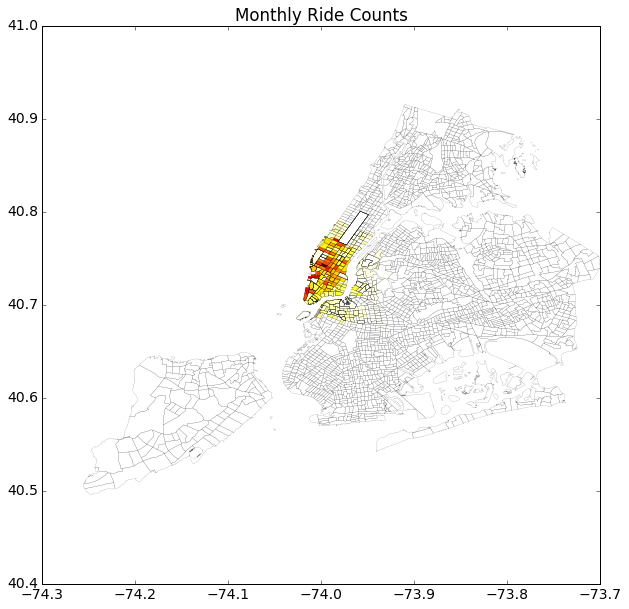

In [35]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts")

## Removing the CTs that are out of zoom boundries

In [36]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

In [37]:
ct_shape_MonthlyAve_Zoom

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry,MonthlyAve,station_id
BoroCT2010,,,,,,,,,,,,,,
1000100,1000100,1,Manhattan,I,000100,1,MN99,park-cemetery-etc-Manhattan,3810,1.844421e+06,11023.047911,(POLYGON ((-74.04387761639912 40.6901876753712...,0.0,0
1000201,1000201,1,Manhattan,E,000201,2.01,MN28,Lower East Side,3809,9.716282e+05,4748.703650,POLYGON ((-73.98449647076764 40.70950966393941...,0.0,0
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,38846.0,1197
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,37833.0,1229
1000202,1000202,1,Manhattan,E,000202,2.02,MN28,Lower East Side,3809,3.315121e+06,8568.208367,(POLYGON ((-73.98237340572007 40.7055433504376...,59132.0,1329
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,2380.0,1365
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,3736.0,1367
1000500,1000500,1,Manhattan,I,000500,5,MN99,park-cemetery-etc-Manhattan,3810,9.081808e+06,32407.899284,(POLYGON ((-74.01092841268031 40.6844914725429...,1503.0,1537
1000600,1000600,1,Manhattan,E,000600,6,MN28,Lower East Side,3809,2.583418e+06,6970.634587,POLYGON ((-73.99022012603876 40.71440493989794...,99604.0,1140


In [38]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed CTs:", len(temp.MonthlyAve)

Total number of CTs: 2166
Number of zoomed CTs: 543


### Map the monthly rides

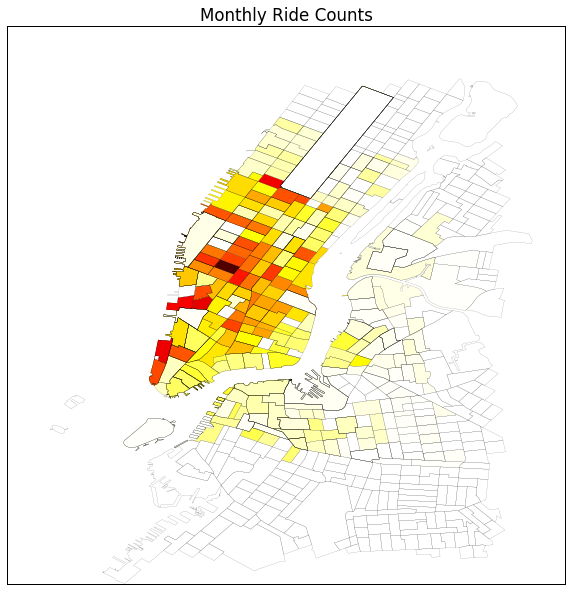

In [39]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='MonthlyAve',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts")

In [40]:
#for spring
tempsp=station_id[['SpringAve']]
tempsp['station_id']=station_id.index
tempsp.index=station_id['BoroCT2010']
ct_shape_SpringAve=ct_shape.join(tempsp)
ct_shape_SpringAve.fillna(0,inplace=True)
ct_shape_SpringAve_Zoom=(ct_shape_SpringAve[ct_shape_SpringAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])
#summer
tempsu=station_id[['SummerAve']]
tempsu['station_id']=station_id.index
tempsu.index=station_id['BoroCT2010']
ct_shape_SummerAve=ct_shape.join(tempsu)
ct_shape_SummerAve.fillna(0,inplace=True)
ct_shape_SummerAve_Zoom=(ct_shape_SummerAve[ct_shape_SummerAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])
#fall
tempf=station_id[['FallAve']]
tempf['station_id']=station_id.index
tempf.index=station_id['BoroCT2010']
ct_shape_FallAve=ct_shape.join(tempf)
ct_shape_FallAve.fillna(0,inplace=True)
ct_shape_FallAve_Zoom=(ct_shape_FallAve[ct_shape_FallAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])
#winter
tempw=station_id[['WinterAve']]
tempw['station_id']=station_id.index
tempw.index=station_id['BoroCT2010']
ct_shape_WinterAve=ct_shape.join(tempw)
ct_shape_WinterAve.fillna(0,inplace=True)
ct_shape_WinterAve_Zoom=(ct_shape_WinterAve[ct_shape_WinterAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

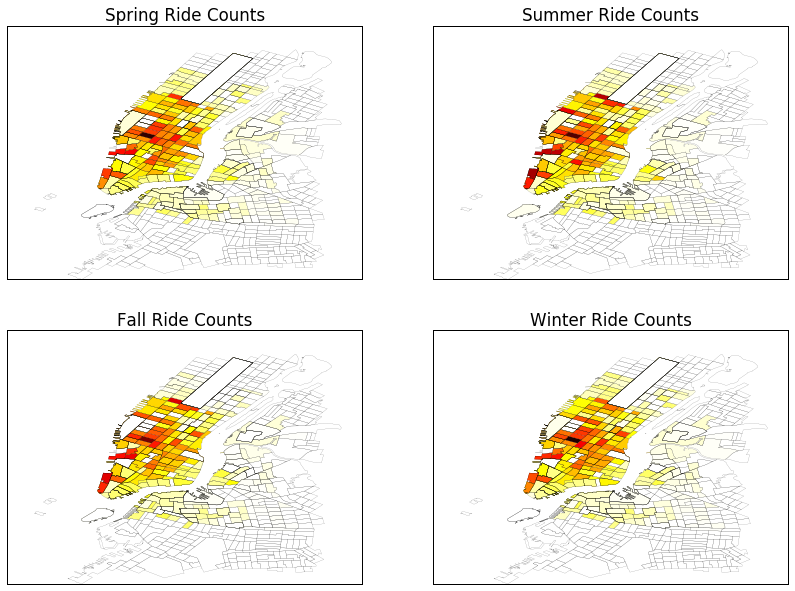

In [41]:
fig = plt.figure(figsize=(14,10))


ax1 = fig.add_subplot(221)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ct_shape_SpringAve_Zoom.plot(column='SpringAve',colormap='hot_r', alpha=1,linewidth=0.1,ax=ax1)
#ax1.legend('spring',loc='best')
plt.title("Spring Ride Counts")

ax2 = fig.add_subplot(222)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ct_shape_SummerAve_Zoom.plot(column='SummerAve',colormap='hot_r', alpha=1,linewidth=0.1,ax=ax2,label='Summer')
#ax2.legend('summer',loc='best')
plt.title("Summer Ride Counts")

ax3 = fig.add_subplot(223)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ct_shape_FallAve_Zoom.plot(column='FallAve',colormap='hot_r', alpha=1,linewidth=0.1,ax=ax3,label='Fall')
#ax3.legend('fall',loc='best')
plt.title("Fall Ride Counts")

ax4 = fig.add_subplot(224)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
ct_shape_WinterAve_Zoom.plot(column='WinterAve',colormap='hot_r', alpha=1,linewidth=0.1,ax=ax4,label='Winter')
#ax4.legend('winter',loc='best')
plt.title("Winter Ride Counts")

# plt.legend(loc = 'best')

### The four heat maps look similar like the heat map of 'Monthly Ride Counts', means there are certain areas that people like using citibike to travel from/to.  Like middle town Manhattan.

## Export Shapefile CTs in the CitiBike Zone

In [42]:
path='/home/cusp/cc5219/PUIdata/Output/ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)

In [43]:
pathsp='/home/cusp/cc5219/PUIdata/Output/ct_shape_SpringAve_Zoom.shp'
ct_shape_SpringAve_Zoom.to_file(pathsp)

In [44]:
pathsu='/home/cusp/cc5219/PUIdata/Output/ct_shape_SummerAve_Zoom.shp'
ct_shape_SummerAve_Zoom.to_file(pathsu)

In [45]:
pathf='/home/cusp/cc5219/PUIdata/Output/ct_shape_FallAve_Zoom.shp'
ct_shape_FallAve_Zoom.to_file(pathf)

In [46]:
pathw='/home/cusp/cc5219/PUIdata/Output/ct_shape_WinterAve_Zoom.shp'
ct_shape_WinterAve_Zoom.to_file(pathw)

## Exploratory Geospatial Analysis

In [47]:
import pysal as ps

### Spatial Weights
Contiguity: Queen Weights

In [48]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


In [49]:
qW_CTsp=ps.queen_from_shapefile(pathsp)

('Island id: ', [0])


In [50]:
qW_CTsu=ps.queen_from_shapefile(pathsu)

('Island id: ', [0])


In [51]:
qW_CTf=ps.queen_from_shapefile(pathf)

('Island id: ', [0])


In [52]:
qW_CTw=ps.queen_from_shapefile(pathw)

('Island id: ', [0])


#### Neighbors of index10

In [53]:
print qW_CT[10]
print qW_CT.cardinalities[10]

{1: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0}
9


In [54]:
print qW_CTsp[10]
print qW_CTsp.cardinalities[10]

{1: 1.0, 37: 1.0, 38: 1.0, 39: 1.0, 8: 1.0, 9: 1.0, 18: 1.0, 19: 1.0, 30: 1.0}
9


#### Matrix of Weights

In [55]:
Wmatrix, ids = qW_CT.full()

In [56]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [57]:
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [58]:
MonthlyRide=ct_shape_MonthlyAve_Zoom.MonthlyAve
MonthlyRideLag=ps.lag_spatial(qW_CT, MonthlyRide)

In [59]:
SpringRide=ct_shape_SpringAve_Zoom.SpringAve
SpringRideLag=ps.lag_spatial(qW_CT, SpringRide)

In [60]:
SummerRide=ct_shape_SummerAve_Zoom.SummerAve
SummerRideLag=ps.lag_spatial(qW_CT, SummerRide)

In [61]:
FallRide=ct_shape_FallAve_Zoom.FallAve
FallRideLag=ps.lag_spatial(qW_CT, FallRide)

In [62]:
WinterRide=ct_shape_WinterAve_Zoom.WinterAve
WinterRideLag=ps.lag_spatial(qW_CT, WinterRide)

#### Create Quantiles for maping

In [63]:
MonthlyRideLagQ10 = ps.Quantiles(MonthlyRideLag, k=10)
MonthlyRideLagQ10

                    Quantiles                    
 
  Lower                Upper                Count
             x[i] <=      0.000               140
     0.000 < x[i] <=    237.571                21
   237.571 < x[i] <=   4167.561                78
  4167.561 < x[i] <=  10026.857                80
 10026.857 < x[i] <=  17493.404                79
 17493.404 < x[i] <=  26977.053                80
 26977.053 < x[i] <=  58126.278                79
 58126.278 < x[i] <=  81788.042                80
 81788.042 < x[i] <=  96870.015                79
 96870.015 < x[i] <= 151983.357                80

In [64]:
SpringRideLagQ10 = ps.Quantiles(SpringRideLag, k=10)
SpringRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    47.286                 2
   47.286 < x[i] <=   871.683                78
  871.683 < x[i] <=  2071.917                80
 2071.917 < x[i] <=  3246.552                79
 3246.552 < x[i] <=  4926.529                80
 4926.529 < x[i] <= 10260.859                79
10260.859 < x[i] <= 13954.059                80
13954.059 < x[i] <= 16552.226                79
16552.226 < x[i] <= 27466.500                80

In [65]:
SummerRideLagQ10 = ps.Quantiles(SummerRideLag, k=10)
SummerRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               140
    0.000 < x[i] <=    77.714                21
   77.714 < x[i] <=  1217.400                78
 1217.400 < x[i] <=  2990.786                80
 2990.786 < x[i] <=  5775.295                79
 5775.295 < x[i] <=  8823.733                80
 8823.733 < x[i] <= 18734.146                79
18734.146 < x[i] <= 26891.214                80
26891.214 < x[i] <= 31578.354                79
31578.354 < x[i] <= 48071.500                80

In [66]:
FallRideLagQ10 = ps.Quantiles(FallRideLag, k=10)
FallRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    67.143                 2
   67.143 < x[i] <=  1216.085                78
 1216.085 < x[i] <=  2595.308                80
 2595.308 < x[i] <=  5575.200                80
 5575.200 < x[i] <=  9014.067                79
 9014.067 < x[i] <= 19095.458                79
19095.458 < x[i] <= 27960.786                80
27960.786 < x[i] <= 32518.594                79
32518.594 < x[i] <= 49521.929                80

In [67]:
WinterRideLagQ10 = ps.Quantiles(WinterRideLag, k=10)
WinterRideLagQ10

                   Quantiles                   
 
  Lower              Upper                Count
            x[i] <=     0.000               159
    0.000 < x[i] <=    45.429                 2
   45.429 < x[i] <=   763.792                78
  763.792 < x[i] <=  1903.583                80
 1903.583 < x[i] <=  3025.970                79
 3025.970 < x[i] <=  4383.619                80
 4383.619 < x[i] <= 10166.268                79
10166.268 < x[i] <= 13938.130                80
13938.130 < x[i] <= 16783.186                79
16783.186 < x[i] <= 26923.429                80

#### Map the monthly rides lag

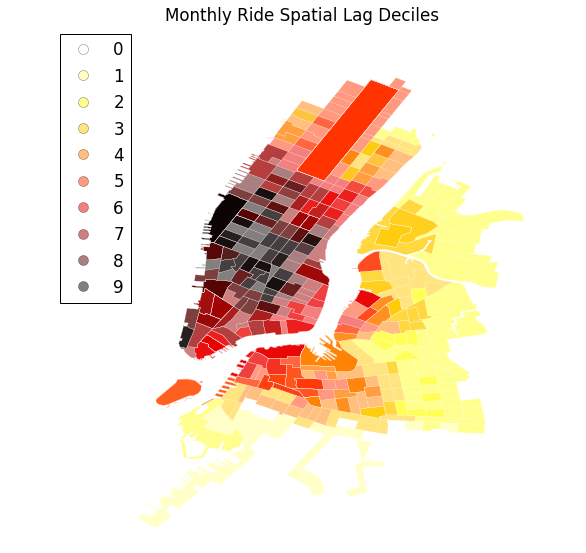

In [68]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Monthly Ride Spatial Lag Deciles")


#### Map the rides lag for four seasons

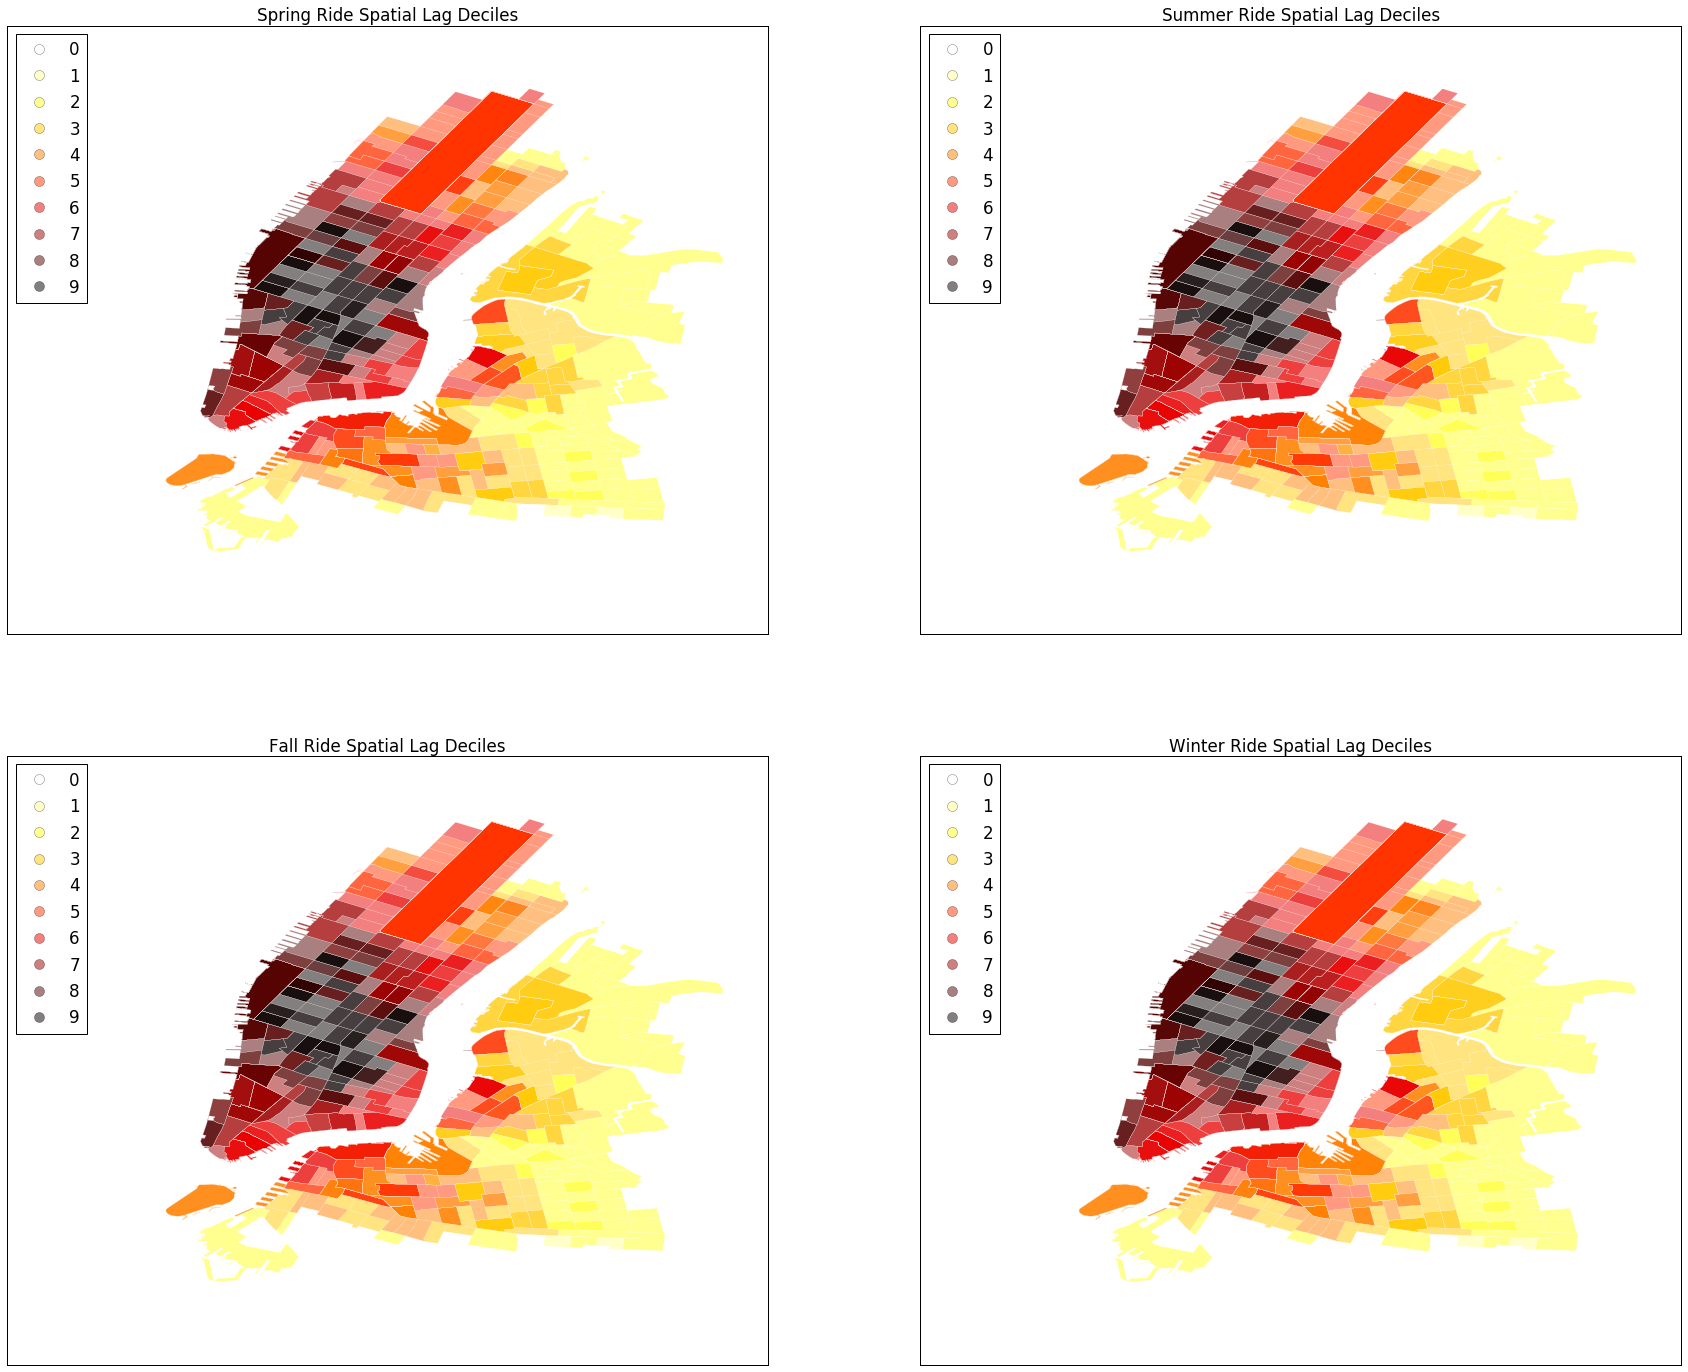

In [69]:
fig = plt.figure(figsize=(30,24))

#spring
ax1 = fig.add_subplot(221)
ct_shape_SpringAve_Zoom.assign(cl=SpringRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax1, 
        edgecolor='white', legend=True)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
#ax1.legend('spring',loc='best')
plt.title("Spring Ride Spatial Lag Deciles")

#summer
ax2 = fig.add_subplot(222)
ct_shape_SummerAve_Zoom.assign(cl=SpringRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax2, 
        edgecolor='white', legend=True)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
#ax1.legend('spring',loc='best')
plt.title("Summer Ride Spatial Lag Deciles")

#fall
ax3 = fig.add_subplot(223)
ct_shape_FallAve_Zoom.assign(cl=SpringRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax3, 
        edgecolor='white', legend=True)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
#ax1.legend('spring',loc='best')
plt.title("Fall Ride Spatial Lag Deciles")

#winter
ax4 = fig.add_subplot(224)
ct_shape_WinterAve_Zoom.assign(cl=SpringRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax4, 
        edgecolor='white', legend=True)
ax4.get_xaxis().set_visible(False)
ax4.get_yaxis().set_visible(False)
#ax1.legend('spring',loc='best')
plt.title("Winter Ride Spatial Lag Deciles")

#@Review: There should be some difference. they seem identical. 
#Hot and Cold map missing for summer and winter

#### These four heat maps look similar . (May because of my mistakes or this is not a good way to ftell the differences)

## Global Spatial Autocorrelation

In [70]:
#monthly
b,a = np.polyfit(MonthlyRide, MonthlyRideLag, 1)
b,a 

(0.65563669282948467, 12557.637062387894)

In [71]:
#spring
bsp,asp = np.polyfit(SpringRide, SpringRideLag, 1)
bsp,asp

(0.65283086982042837, 2232.104596780136)

In [72]:
#summer
bsu,asu = np.polyfit(SummerRide, SummerRideLag, 1)
bsu,asu

(0.64276388118020711, 4220.7777009665051)

In [73]:
#fall
bf,af = np.polyfit(FallRide, FallRideLag, 1)
bf,af

(0.63837300712795031, 4328.9501746684482)

In [74]:
#winter
bw,aw = np.polyfit(WinterRide, WinterRideLag, 1)
bw,aw

(0.65791812867838495, 2135.438012377781)

### Moran Scatterplot

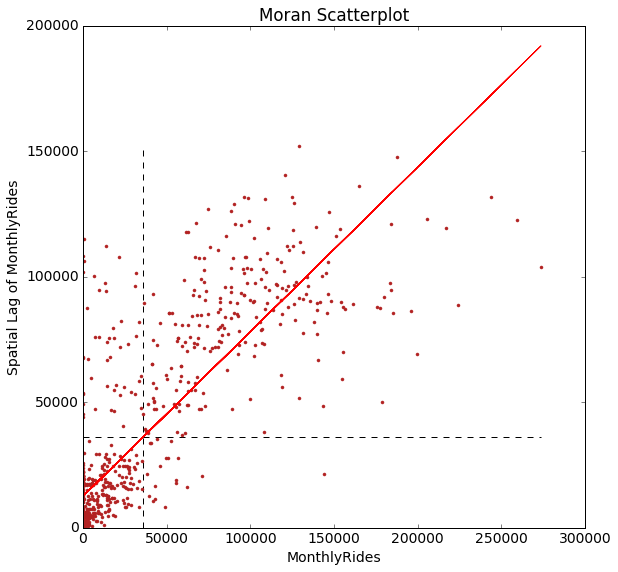

In [75]:
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(MonthlyRide, MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')

### Moran Scatterplot for four seansons

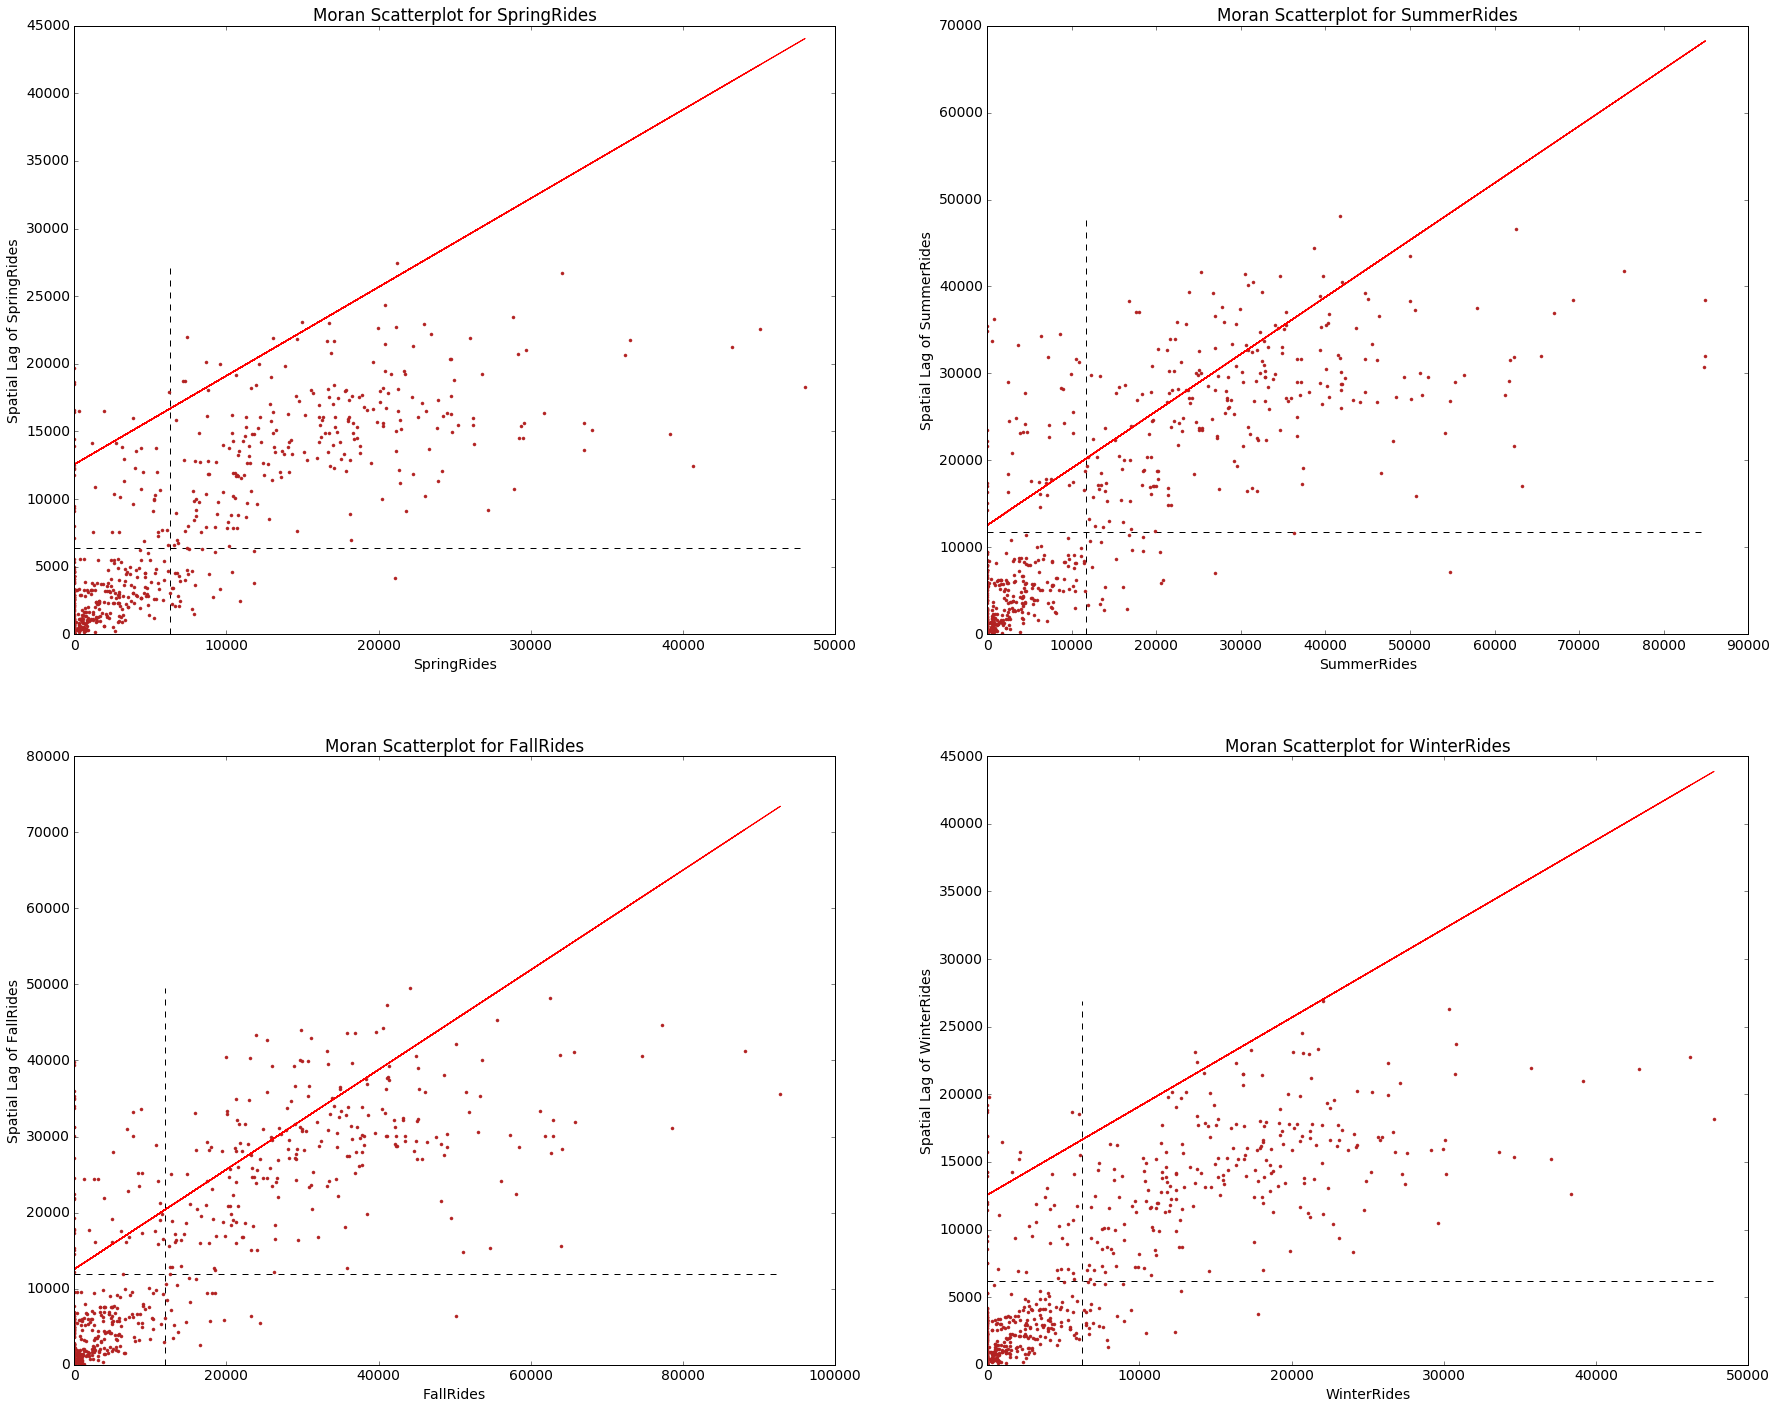

In [76]:
fig = plt.figure(figsize=(30,24))

#spring
ax1 = fig.add_subplot(221)
plt.plot(SpringRide, SpringRideLag, '.', color='firebrick')
# dashed vert at mean of the last year's PCI
plt.vlines(SpringRide.mean(), SpringRideLag.min(), SpringRideLag.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
plt.hlines(SpringRideLag.mean(), SpringRide.min(), SpringRide.max(), linestyle='--')
# red line of best fit using global I as slope
plt.plot(SpringRide, a + b*SpringRide, 'r')
plt.title('Moran Scatterplot for SpringRides')
plt.ylabel('Spatial Lag of SpringRides')
plt.xlabel('SpringRides')

#summer
ax2 = fig.add_subplot(222)
plt.plot(SummerRide, SummerRideLag, '.', color='firebrick')
# dashed vert at mean of the last year's PCI
plt.vlines(SummerRide.mean(), SummerRideLag.min(), SummerRideLag.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
plt.hlines(SummerRideLag.mean(), SummerRide.min(), SummerRide.max(), linestyle='--')
# red line of best fit using global I as slope
plt.plot(SummerRide, a + b*SummerRide, 'r')
plt.title('Moran Scatterplot for SummerRides')
plt.ylabel('Spatial Lag of SummerRides')
plt.xlabel('SummerRides')

#fall
ax3 = fig.add_subplot(223)
plt.plot(FallRide, FallRideLag, '.', color='firebrick')
# dashed vert at mean of the last year's PCI
plt.vlines(FallRide.mean(), FallRideLag.min(), FallRideLag.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
plt.hlines(FallRideLag.mean(), FallRide.min(), FallRide.max(), linestyle='--')
# red line of best fit using global I as slope
plt.plot(FallRide, a + b*FallRide, 'r')
plt.title('Moran Scatterplot for FallRides')
plt.ylabel('Spatial Lag of FallRides')
plt.xlabel('FallRides')

#winter
ax4 = fig.add_subplot(224)
plt.plot(WinterRide, WinterRideLag, '.', color='firebrick')
# dashed vert at mean of the last year's PCI
plt.vlines(WinterRide.mean(), WinterRideLag.min(), WinterRideLag.max(), linestyle='--')
# dashed horizontal at mean of lagged PCI
plt.hlines(WinterRideLag.mean(), WinterRide.min(), WinterRide.max(), linestyle='--')
# red line of best fit using global I as slope
plt.plot(WinterRide, a + b*WinterRide, 'r')
plt.title('Moran Scatterplot for WinterRides')
plt.ylabel('Spatial Lag of WinterRides')
plt.xlabel('WinterRides')

#### The spatial lags for winter and spring are higher than those for summer and fall. 

### Moran's I

In [77]:
I_MonthlyRide = ps.Moran(MonthlyRide, qW_CT)
I_MonthlyRide.I, I_MonthlyRide.p_sim

(0.65579332908409083, 0.001)

#### Thus, the $I$ statistic is $0.656$ for this data, and has a very small $p$ value. 

In [78]:
I_MonthlyRide.sim[0:10]

array([ 0.00952256,  0.01299033, -0.01588529,  0.01283717,  0.01271837,
        0.00529031,  0.0174299 , -0.01180277, -0.01637234, -0.01075921])

In [79]:
I_SpringRide = ps.Moran(SpringRide, qW_CT)
I_SpringRide.I, I_SpringRide.p_sim

(0.65295816238601889, 0.001)

In [80]:
I_SpringRide.sim[0:10]

array([-0.01070261, -0.02860998,  0.02463647,  0.0272731 , -0.0179935 ,
       -0.00947521,  0.00692666,  0.00305902, -0.0176971 , -0.00633159])

In [81]:
I_SummerRide = ps.Moran(SummerRide, qW_CT)
I_SummerRide.I, I_SummerRide.p_sim

(0.64290951440874322, 0.001)

In [82]:
I_SummerRide.sim[0:10]

array([-0.01321581,  0.01378831, -0.00279546, -0.01404582, -0.00622464,
        0.01314442,  0.01865004,  0.02817788, -0.00824753, -0.00161179])

In [83]:
I_FallRide = ps.Moran(FallRide, qW_CT)
I_FallRide.I, I_FallRide.p_sim

(0.63854999388632616, 0.001)

In [84]:
I_FallRide.sim[0:10]

array([-0.00859596,  0.00393314, -0.00580831,  0.01112085, -0.01696088,
        0.00135367, -0.01829623, -0.01277747,  0.01150691, -0.01412766])

In [85]:
I_WinterRide = ps.Moran(WinterRide, qW_CT)
I_WinterRide.I, I_WinterRide.p_sim

(0.65807911213278847, 0.001)

In [86]:
I_WinterRide.sim[0:10]

array([ 0.01102195,  0.00433824, -0.009259  , -0.01309696, -0.00446856,
       -0.00894787,  0.01330555,  0.00540143,  0.03193926, -0.0051843 ])

### KDEplot of all of the simulated points

the vertical line shows the observed value

(-0.7, 0.7)

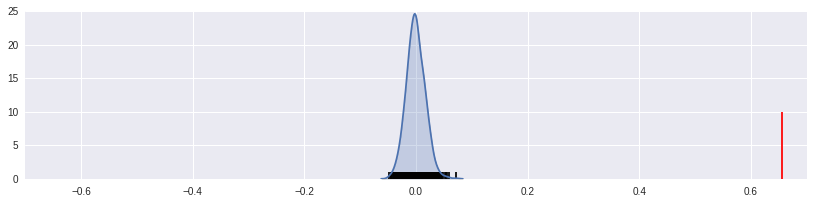

In [87]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])

##### In the following figure the vertical line is showing if our I statistic were close to our expected value

(-0.7, 0.7)

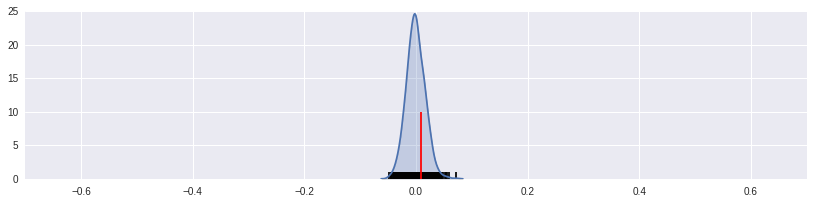

In [88]:
sns.kdeplot(I_MonthlyRide.sim, shade=True)
plt.vlines(I_MonthlyRide.sim, 0, 1)
plt.vlines(I_MonthlyRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])

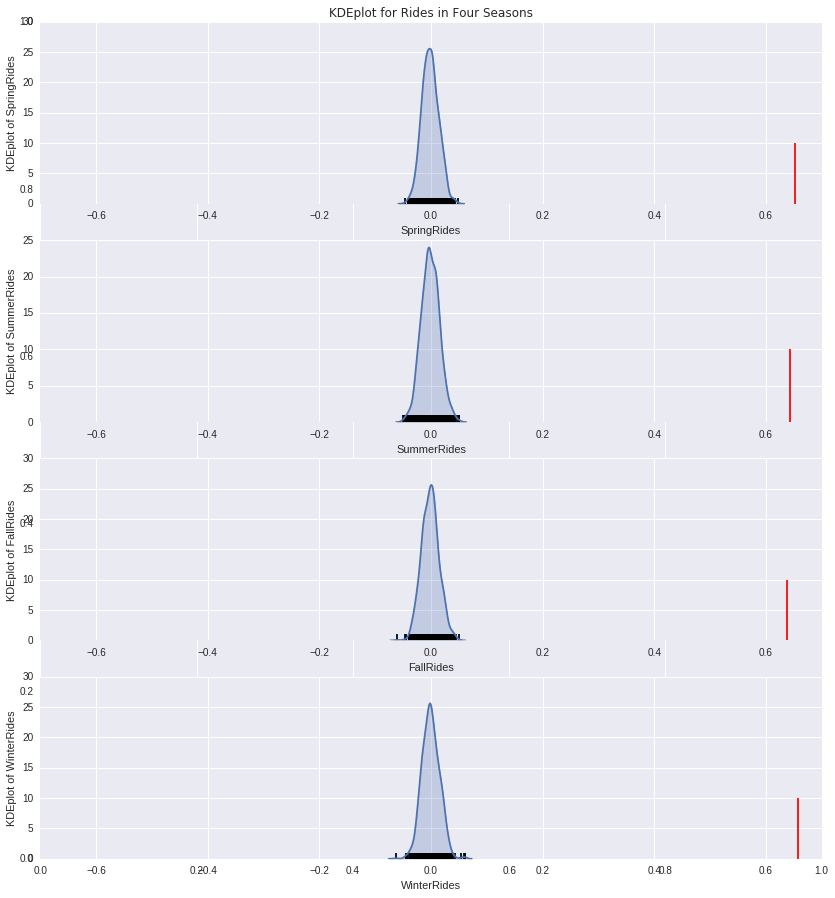

In [93]:
fig = plt.figure(figsize=(14,15))
plt.title('KDEplot for Rides in Four Seasons')
#spring
ax1 = fig.add_subplot(411)
sns.kdeplot(I_SpringRide.sim, shade=True)
plt.vlines(I_SpringRide.sim, 0, 1)
plt.vlines(I_SpringRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
plt.ylabel('KDEplot of SpringRides')
plt.xlabel('SpringRides')

#summer
ax1 = fig.add_subplot(412)
sns.kdeplot(I_SummerRide.sim, shade=True)
plt.vlines(I_SummerRide.sim, 0, 1)
plt.vlines(I_SummerRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for SummerRides')
plt.ylabel('KDEplot of SummerRides')
plt.xlabel('SummerRides')

#fall
ax1 = fig.add_subplot(413)
sns.kdeplot(I_FallRide.sim, shade=True)
plt.vlines(I_FallRide.sim, 0, 1)
plt.vlines(I_FallRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for FallRides')
plt.ylabel('KDEplot of FallRides')
plt.xlabel('FallRides')

#winter
ax1 = fig.add_subplot(414)
sns.kdeplot(I_WinterRide.sim, shade=True)
plt.vlines(I_WinterRide.sim, 0, 1)
plt.vlines(I_WinterRide.I, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for WinterRides')
plt.ylabel('KDEplot of WinterRides')
plt.xlabel('WinterRides')

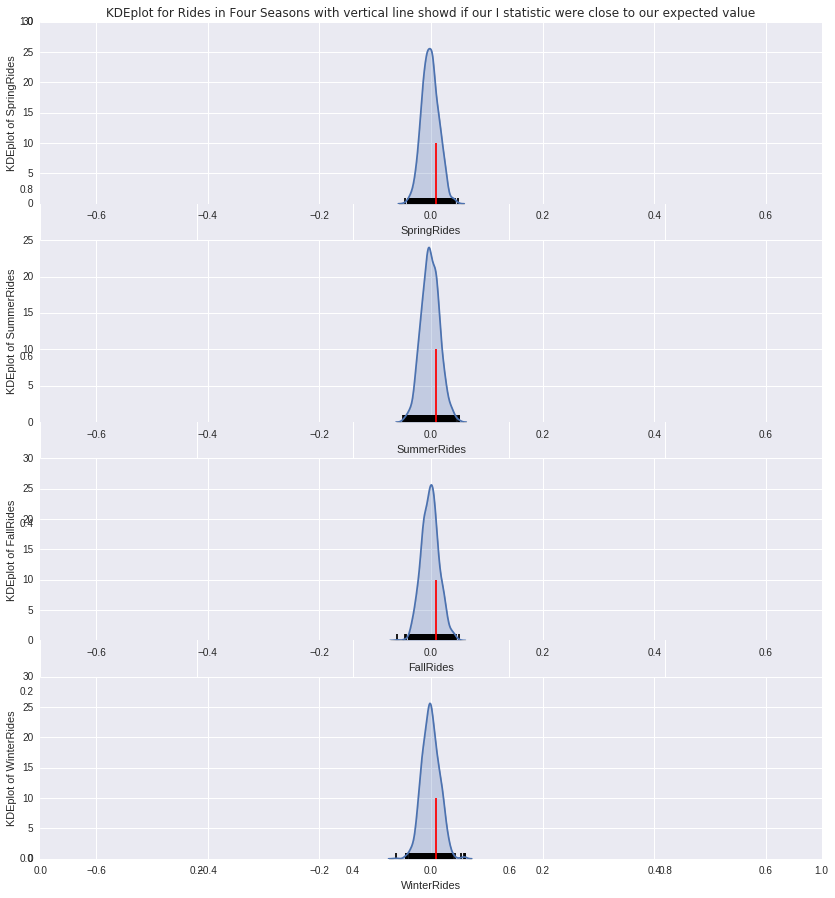

In [95]:
fig = plt.figure(figsize=(14,15))
plt.title('KDEplot for Rides in Four Seasons with vertical line showd if our I statistic were close to our expected value')
#spring
ax1 = fig.add_subplot(411)
sns.kdeplot(I_SpringRide.sim, shade=True)
plt.vlines(I_SpringRide.sim, 0, 1)
plt.vlines(I_SpringRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for SpringRides')
plt.ylabel('KDEplot of SpringRides')
plt.xlabel('SpringRides')

#summer
ax1 = fig.add_subplot(412)
sns.kdeplot(I_SummerRide.sim, shade=True)
plt.vlines(I_SummerRide.sim, 0, 1)
plt.vlines(I_SummerRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for SummerRides')
plt.ylabel('KDEplot of SummerRides')
plt.xlabel('SummerRides')

#fall
ax1 = fig.add_subplot(413)
sns.kdeplot(I_FallRide.sim, shade=True)
plt.vlines(I_FallRide.sim, 0, 1)
plt.vlines(I_FallRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for FallRides')
plt.ylabel('KDEplot of FallRides')
plt.xlabel('FallRides')

#winter
ax1 = fig.add_subplot(414)
sns.kdeplot(I_WinterRide.sim, shade=True)
plt.vlines(I_WinterRide.sim, 0, 1)
plt.vlines(I_WinterRide.EI+.01, 0, 10, 'r')
plt.xlim([-.70, .70])
#plt.title('KDEplot for WinterRides')
plt.ylabel('KDEplot of WinterRides')
plt.xlabel('WinterRides')

## Local Spatial Autocorrelation

In [96]:
LMo_MonthlyRide = ps.Moran_Local(MonthlyRide, qW_CT,permutations=999)
LMo_MonthlyRide.Is[0:5], LMo_MonthlyRide.p_sim[0:5]

(array([-0.        , -0.25378156,  0.00285019,  0.00186   ,  0.00802061]),
 array([ 0.001,  0.169,  0.38 ,  0.396,  0.447]))

In [97]:
LMo_SpringRide = ps.Moran_Local(SpringRide, qW_CT,permutations=999)
LMo_SpringRide.Is[0:5], LMo_SpringRide.p_sim[0:5]

(array([-0.        , -0.27975328,  0.0010341 , -0.00050606, -0.01179321]),
 array([ 0.001,  0.184,  0.442,  0.393,  0.493]))

In [98]:
LMo_SummerRide = ps.Moran_Local(SummerRide, qW_CT,permutations=999)
LMo_SummerRide.Is[0:5], LMo_SummerRide.p_sim[0:5]

(array([-0.        , -0.24500733,  0.01487286,  0.00269273,  0.02179414]),
 array([ 0.001,  0.179,  0.321,  0.352,  0.4  ]))

In [99]:
LMo_FallRide = ps.Moran_Local(FallRide, qW_CT,permutations=999)
LMo_FallRide.Is[0:5], LMo_FallRide.p_sim[0:5]

(array([-0.        , -0.22260215,  0.00298854,  0.00212863,  0.0107835 ]),
 array([ 0.001,  0.186,  0.431,  0.38 ,  0.437]))

In [100]:
LMo_WinterRide = ps.Moran_Local(WinterRide, qW_CT,permutations=999)
LMo_WinterRide.Is[0:5], LMo_WinterRide.p_sim[0:5]

(array([-0.        , -0.28144544,  0.00132628, -0.00265961, -0.06467646]),
 array([ 0.001,  0.154,  0.499,  0.472,  0.44 ]))

## LISA (Local Indicators of Spatial Autocorrelation)

In [101]:
sigs = MonthlyRide[LMo_MonthlyRide.p_sim <= .001]
W_sigs = MonthlyRideLag[LMo_MonthlyRide.p_sim <= .001]
insigs = MonthlyRide[LMo_MonthlyRide.p_sim > .001]
W_insigs = MonthlyRideLag[LMo_MonthlyRide.p_sim > .001]

In [102]:
#spring
sigssp = SpringRide[LMo_SpringRide.p_sim <= .001]
W_sigssp = SpringRideLag[LMo_SpringRide.p_sim <= .001]
insigssp = SpringRide[LMo_SpringRide.p_sim > .001]
W_insigssp = SpringRideLag[LMo_SpringRide.p_sim > .001]
#summer
sigssu = SummerRide[LMo_SummerRide.p_sim <= .001]
W_sigssu = SummerRideLag[LMo_SummerRide.p_sim <= .001]
insigssu = SummerRide[LMo_SummerRide.p_sim > .001]
W_insigssu = SummerRideLag[LMo_SummerRide.p_sim > .001]
#fall
sigsf = FallRide[LMo_FallRide.p_sim <= .001]
W_sigsf = FallRideLag[LMo_FallRide.p_sim <= .001]
insigsf = FallRide[LMo_FallRide.p_sim > .001]
W_insigsf = FallRideLag[LMo_FallRide.p_sim > .001]
#winter
sigsw = WinterRide[LMo_WinterRide.p_sim <= .001]
W_sigsw = WinterRideLag[LMo_WinterRide.p_sim <= .001]
insigsw = WinterRide[LMo_WinterRide.p_sim > .001]
W_insigsw = WinterRideLag[LMo_WinterRide.p_sim > .001]

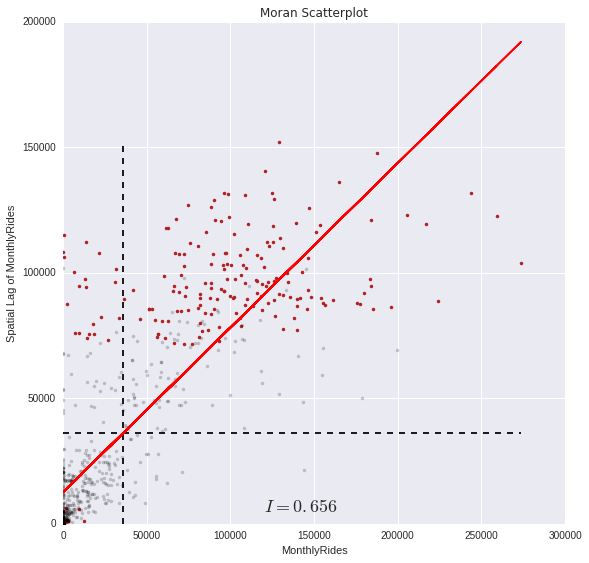

In [103]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(MonthlyRide.mean(), MonthlyRideLag.min(), MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(MonthlyRideLag.mean(), MonthlyRide.min(), MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(MonthlyRide, a + b*MonthlyRide, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of MonthlyRides')
plt.xlabel('MonthlyRides')
